In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import statistics
import cv2

In [2]:
# Omitting the posterior tissue in the segmentation
main_path = '../data/Task04_Hippocampus/'
img_files = sorted(os.listdir(main_path+'imagesTr'))
seg_files = sorted(os.listdir(main_path+'labelsTr'))

In [6]:
for i in img_files:
    #     img = nib.load(main_path+'imagesTr/'+ i)
    seg = nib.load(main_path+'labelsTr/'+i)
    seg_affine = seg.affine
    #     img = img.get_fdata()
    seg = seg.get_fdata()
    seg[seg==1]=0
    for j in range(img.shape[0]):
        
    seg = nib.Nifti1Image(seg, affine=seg_affine)
    nib.save(seg, main_path+'labels_right/'+i)

IndentationError: expected an indented block (<ipython-input-6-dbe1079d7a60>, line 10)

In [5]:
for i in img_files:
    seg = nib.load(main_path+'labels_right/'+i)
    seg_affine = seg.affine
    seg = seg.get_fdata()
    print(np.unique(seg))

FileNotFoundError: No such file or no access: '../data/Task04_Hippocampus/labels_right/hippocampus_001.nii.gz'

In [7]:
for i in img_files:
    img = nib.load(main_path+'imagesTr/'+ i)
    img = img.get_fdata()
    print(img.shape)

(35, 51, 35)
(34, 52, 35)
(36, 52, 38)
(35, 52, 34)
(34, 47, 40)
(36, 48, 40)
(36, 50, 31)
(39, 50, 40)
(42, 51, 28)
(35, 48, 32)
(36, 47, 41)
(36, 46, 43)
(35, 51, 35)
(38, 52, 33)
(35, 48, 35)
(36, 50, 36)
(33, 48, 38)
(36, 49, 40)
(35, 47, 37)
(36, 47, 39)
(34, 51, 32)
(37, 51, 35)
(34, 53, 34)
(36, 52, 37)
(36, 51, 34)
(37, 52, 34)
(38, 48, 33)
(36, 48, 37)
(36, 49, 38)
(38, 52, 29)
(35, 51, 36)
(38, 49, 38)
(33, 54, 39)
(34, 52, 40)
(37, 51, 35)
(41, 47, 42)
(35, 51, 34)
(34, 53, 36)
(39, 52, 31)
(35, 53, 35)
(39, 52, 37)
(36, 42, 41)
(36, 40, 43)
(37, 50, 38)
(37, 47, 42)
(32, 47, 41)
(35, 47, 45)
(33, 52, 37)
(34, 52, 37)
(35, 55, 32)
(40, 52, 35)
(34, 51, 38)
(37, 50, 40)
(36, 51, 29)
(38, 49, 28)
(34, 53, 37)
(38, 50, 38)
(34, 49, 39)
(34, 47, 39)
(37, 48, 34)
(37, 48, 34)
(33, 52, 27)
(36, 52, 32)
(36, 55, 32)
(35, 53, 39)
(33, 47, 37)
(34, 46, 38)
(35, 55, 34)
(36, 53, 37)
(36, 49, 36)
(38, 50, 39)
(32, 53, 38)
(35, 55, 41)
(43, 42, 39)
(39, 44, 43)
(38, 55, 31)
(35, 49, 40)

In [12]:
#Finding the median dimension
main_path = '../data/Task04_Hippocampus/'
img_files = sorted(os.listdir(main_path+'imagesTr'))
seg_files = sorted(os.listdir(main_path+'labelsTr'))
main_path_new = '../data/Task04_Hippocampus_new/'

In [13]:
dim1 = []
dim2 = []
for i in img_files:
    img = nib.load(main_path+'imagesTr/'+ i)
    img = img.get_fdata()
    a,b,c = img.shape
    dim1.append(b)
    dim2.append(c)

In [14]:
med_dim1, med_dim2 = int(statistics.median(dim1)), int(statistics.median(dim2))

In [15]:
count = 1
for i in img_files:
    img = nib.load(main_path+'imagesTr/'+ i)
    seg = nib.load(main_path+'labelsTr/'+ i)
    seg = seg.get_fdata()
    img = img.get_fdata()
    for j in range(seg.shape[0]):
        img_slice = cv2.resize(img[j,:,:], dsize=(med_dim1, med_dim2), interpolation=cv2.INTER_NEAREST)
        slice_seg = cv2.resize(seg[j,:,:], dsize=(med_dim1, med_dim2), interpolation=cv2.INTER_NEAREST)
        
        if j ==0:
#             new_img = np.zeros_like(img_slice).resize(med_dim1, med_dim2,1)
#             new_seg = np.zeros_like(slice_seg).resize(med_dim1, med_dim2,1)
            new_img = np.expand_dims(img_slice,axis=2)
            new_seg = np.expand_dims(slice_seg,axis=2)
        else:
            img_slice = np.expand_dims(img_slice,axis=2)
            slice_seg = np.expand_dims(slice_seg,axis=2)
            new_img = np.append(new_img, img_slice, axis = 2)
            new_seg = np.append(new_seg, slice_seg, axis = 2)
#         fig = plt.figure()
#         plt.subplot(2,1,1).imshow(new_img[:,:,j], cmap='gray')
#         plt.subplot(2,1,2).imshow(new_seg[:,:,j], cmap='gray')
#         plt.show()
#     print(new_img.shape, new_seg.shape)
    np.save(file = main_path_new+'imagesTr/'+str(count)+'.npy', arr = new_img)
    np.save(file = main_path_new+'labelsTr/'+str(count)+'.npy', arr = new_seg)
    count+=1
#         print(np.unique(slice_seg), slice_seg.shape)
#         fig = plt.figure()
#         plt.subplot(2,1,1).imshow(img_slice, cmap='gray')
#         plt.subplot(2,1,2).imshow(slice_seg, cmap='gray')
#         plt.show()

In [16]:
img_files_new = sorted(os.listdir(main_path_new+'imagesTr'))
seg_files_new = sorted(os.listdir(main_path_new+'labelsTr'))

In [9]:
for i in img_files_new:
    img = np.load(main_path_new+'imagesTr/'+ i)
    seg = np.load(main_path_new+'labelsTr/'+i)
    print(img.shape, seg.shape)
    seg[seg==1]=0
    seg[seg==2]=1
    print(np.unique(seg))
    np.save(arr = seg, file = main_path_new+'labels_right/'+i)
#     for j in range(seg.shape[2]):
#         fig = plt.figure()
#         plt.subplot(2,1,1).imshow(img[:,:,j], cmap='gray')
#         plt.subplot(2,1,2).imshow(seg[:,:,j], cmap='gray')
#         plt.show()

(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 38) (36, 50, 38)
[0. 1.]
(36, 50, 36) (36, 50, 36)
[0. 1.]
(36, 50, 41) (36, 50, 41)
[0. 1.]
(36, 50, 34) (36, 50, 34)
[0. 1.]
(36, 50, 36) (36, 50, 36)
[0. 1.]
(36, 50, 36) (36, 50, 36)
[0. 1.]
(36, 50, 34) (36, 50, 34)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 34) (36, 50, 34)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 36) (36, 50, 36)
[0. 1.]
(36, 50, 37) (36, 50, 37)
[0. 1.]
(36, 50, 33) (36, 50, 33)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 33) (36, 50, 33)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 37) (36, 50, 37)
[0. 1.]
(36, 50, 33) (36, 50, 33)
[0. 1.]
(36, 50, 37) (36, 50, 37)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 37) (36, 50, 37)
[0. 1.]
(36, 50, 36) (36, 50, 36)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 37) (36, 50, 37)
[0. 1.]
(36, 50, 33) (36, 50, 33)
[0. 1.]
(36, 50, 35) (36, 50, 35)
[0. 1.]
(36, 50, 33) (36, 50, 33)
[0. 1.]
(36, 50, 38) (

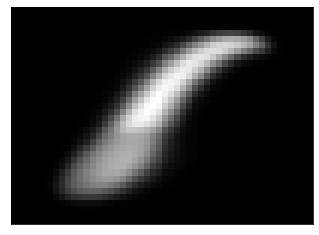

In [18]:
seg_files_new = sorted(os.listdir(main_path_new+'labelsTr'))
count = 0
for i in seg_files_new[:int(len(seg_files_new))]:
    seg = np.load(main_path_new+'labelsTr/'+i)
#     print(img.shape, seg.shape)
    if count == 0:
        mean = np.mean(seg, axis = 2)
    else:
        mean+=np.mean(seg, axis=2)
    count+=1
#     mean /= np.max(mean)
#     mean *= 2
#     mean = mean.astype(int)
#     print(np.min(mean), np.max(mean))
#     for j in range(seg.shape[2]):
mean=mean/(count+1)
fig = plt.figure()
plt.imshow(mean, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [19]:
print(np.min(mean), np.max(mean))

0.0 0.6740508452128108


In [20]:
mean /= np.max(mean)
mean *= 2
# mean = mean.astype(int)
print(np.unique(mean))

[0.00000000e+00 2.99166688e-04 3.07252275e-04 3.24809547e-04
 3.34362769e-04 3.44494975e-04 5.98333377e-04 6.14504549e-04
 6.23976236e-04 6.49619095e-04 6.68725539e-04 6.69304522e-04
 6.88989949e-04 8.97500065e-04 9.21756824e-04 9.74428642e-04
 1.19666675e-03 1.22900910e-03 1.26705892e-03 1.28380907e-03
 1.28732333e-03 1.29923819e-03 1.32056407e-03 1.33745108e-03
 1.53626137e-03 1.57350407e-03 1.79500013e-03 1.82064299e-03
 1.84351365e-03 1.86539229e-03 1.94885728e-03 2.00617662e-03
 2.06696985e-03 2.17590343e-03 2.23209741e-03 2.56336183e-03
 2.59847638e-03 2.75595980e-03 2.98234221e-03 3.00628394e-03
 3.03594509e-03 3.06205905e-03 3.06912620e-03 3.07252275e-03
 3.18096473e-03 3.20284337e-03 3.22692477e-03 3.24809547e-03
 3.32683718e-03 3.34362769e-03 3.38753392e-03 3.41701772e-03
 3.42876416e-03 3.64795327e-03 3.68972249e-03 3.89859080e-03
 4.01235323e-03 4.08574326e-03 4.20413569e-03 4.21201635e-03
 4.30153184e-03 4.37176094e-03 4.37339617e-03 4.54733366e-03
 4.66946452e-03 4.704817

In [21]:
mean[np.where((mean>0) & (mean<0.5))] = 0
mean[np.where((mean>=0.5) & (mean<1.5))] = 1
mean[np.where((mean>=1.5) & (mean<=2))] = 2

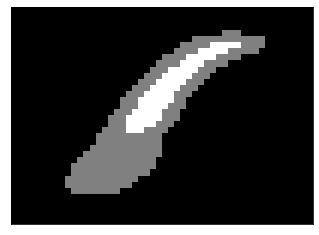

In [22]:
# mean=mean/(count+1)
fig = plt.figure()
plt.imshow(mean, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
np.save(arr = mean, file = '../mean_priors/meanSP.npy')

In [73]:
np.unique(mean)

array([0., 1., 2.])

In [ ]:
seg_files_new = sorted(os.listdir(main_path_new+'labelsTr'))
for j in [0.2, 0.4,]
count = 0
for i in seg_files_new[:int(0.8*len(seg_files_new))]:
    seg = np.load(main_path_new+'labelsTr/'+i)
#     print(img.shape, seg.shape)
    if count == 0:
        mean = np.mean(seg, axis = 2)
    else:
        mean+=np.mean(seg, axis=2)
    count+=1
#     mean /= np.max(mean)
#     mean *= 2
#     mean = mean.astype(int)
#     print(np.min(mean), np.max(mean))
#     for j in range(seg.shape[2]):
mean=mean/(count+1)
fig = plt.figure()
plt.imshow(mean, cmap='gray')
plt.show()